In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [18]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(columns='job_skills',index='job_posted_month_no',aggfunc='size',fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns=['job_posted_month_no'])


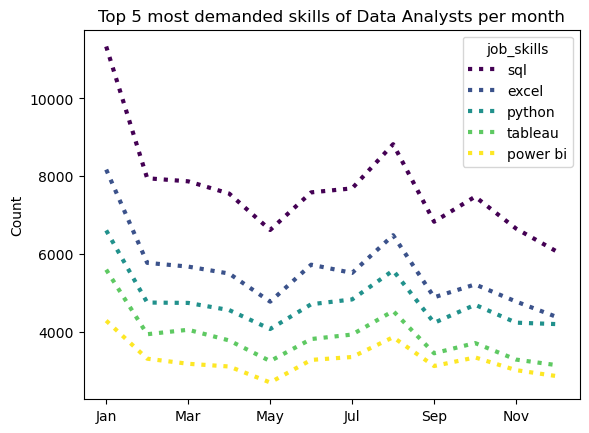

In [ ]:
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=3,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5
    figsize=(10,5)                           
)
plt.title('Top 5 most demanded skills of Data Analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [20]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'xamarin', 'mattermost', 'gtx', 'esquisse', 'chainer', 'capacitor',
       'nuxt.js', 'msaccess', 'ovh', 'suse'],
      dtype='object', name='job_skills', length=235)

In [25]:
df_exploded = df_DA.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)


skill_count=20
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)

In [26]:
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


In [37]:
from adjustText import adjust_text

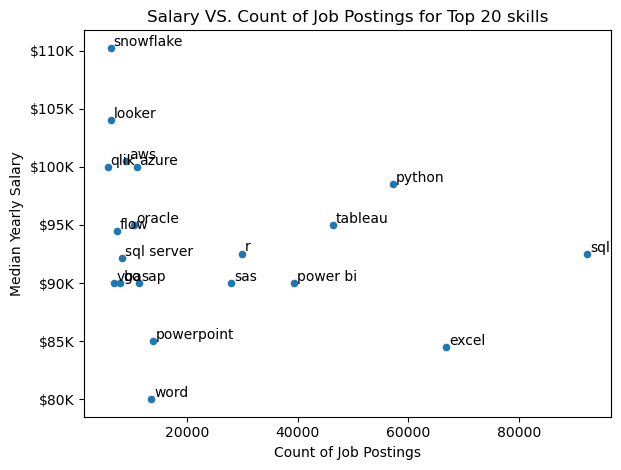

In [43]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title(f'Salary VS. Count of Job Postings for Top {skill_count} skills')
plt.ylabel('Median Yearly Salary')
plt.xlabel('Count of Job Postings')
plt.tight_layout()

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
texts=[]
adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray'))

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i]+500,skill_stats['median_salary'].iloc[i]+200,txt))





plt.show()